# Nome: Henrique Augusto Gomes Togo
# Matrícula: 231111280

## Questão 1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def gauss(mean, variance, x):
    gauss_vec = []
    for i in range(len(x)):
        prob = np.exp(-(x[i] - mean)**2/(2*variance))/(2*np.pi*variance)**(1/2)
        gauss_vec.append(prob)
    return gauss_vec

In [3]:
def uniform(x):
    return np.ones(len(x)) * 1/(np.max(x) - np.min(x))



In [4]:
x = np.linspace(-2, 2, 1000)
mean = 2
variance = 1
gauss_x = gauss(mean, variance, x)
uniform_x = uniform(x)


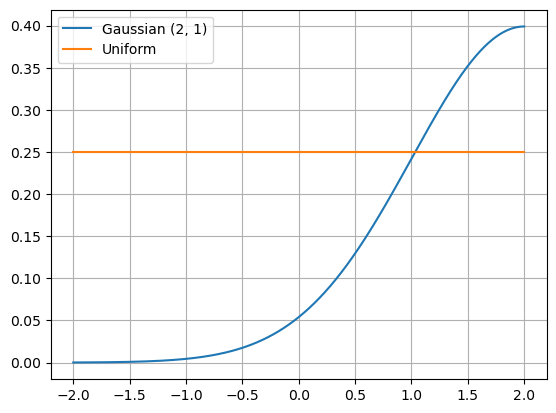

In [5]:
plt.plot(x, gauss_x)
plt.plot(x, uniform_x)
plt.grid('on')
plt.legend(['Gaussian (2, 1)', 'Uniform'])
plt.show()

In [6]:
prior_c1 = 0.6
prior_c2 = 0.4
g1 = np.log(gauss_x) + np.log(0.6)
g2 = np.log(uniform_x) + np.log(0.4)
g = g1 - g2

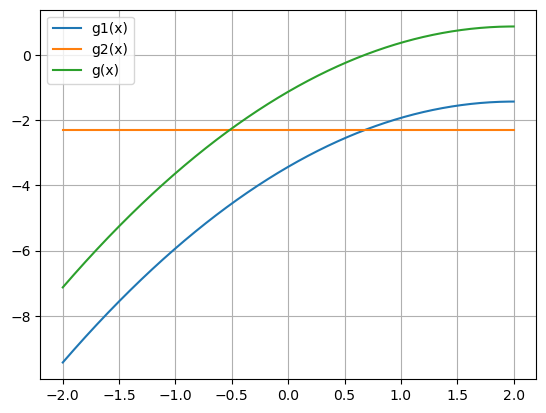

In [7]:
plt.plot(x, g1)
plt.plot(x, g2)
plt.plot(x, g)
plt.legend(['g1(x)', 'g2(x)', 'g(x)'])
plt.grid('on')
plt.show()

## Questão 2


[]

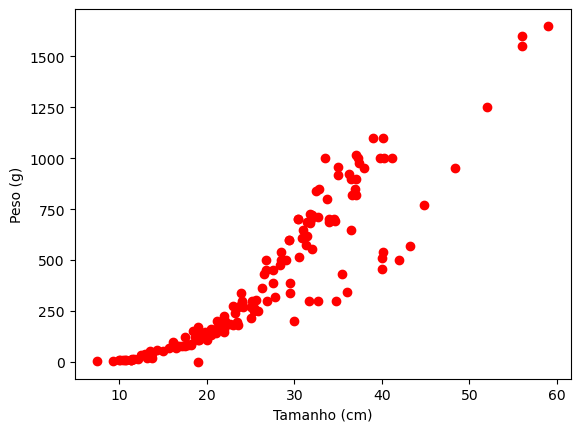

In [34]:
data = np.loadtxt('Fish.csv', delimiter=',', dtype=str)
weight, size = data[1:, 1], data[1:, 2]
weight = np.float64(weight)
size = np.float64(size)

plt.plot(size, weight, 'ro')
plt.xlabel('Tamanho (cm)')
plt.ylabel('Peso (g)')
plt.plot()